In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

In [4]:
X,y = datasets.make_moons(n_samples=200, shuffle=True, noise=0.2, random_state=1234)
y = np.reshape(y, (len(y),1))
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

In [5]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [6]:
print (x_min, x_max)
print (xx.shape)

-2.6229983268026626 2.6011709449327003
(265, 262)


In [13]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100),alpha=1, activation ='tanh', max_iter=1000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print (score)

/home/ankdesh/virtualenvs/pytorch/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8375


In [14]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

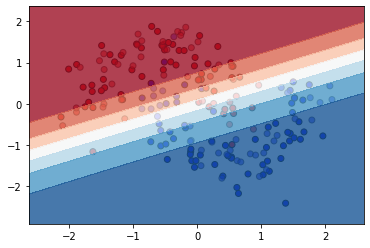

In [15]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

#ax.set_title("Input data")
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)